In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Data Preparation

In [2]:
# Read crypto_data.csv into Pandas
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
# Discard all cryptocurrencies that are not being traded
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]

# Drop the IsTrading column from the dataframe
crypto_df = crypto_df.drop(columns = 'IsTrading')
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [4]:
# Remove all rows that have at least one null value
crypto_df = crypto_df.dropna()
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [5]:
# Filter for cryptocurrencies that have been mined
crypto_df = crypto_df.loc[crypto_df['TotalCoinsMined'] > 0]
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [6]:
# Delete the CoinName from the original dataframe
crypto_df = crypto_df.drop(columns = 'CoinName')
crypto_df.head()

,Unnamed: 0,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,Scrypt,PoW/PoS,4.199995e+01,42
2,404,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethash,PoW,1.076842e+08,0


In [7]:
# Drop column "Unnamed: 0"
crypto_df.drop(columns = 'Unnamed: 0', inplace = True)

In [8]:
crypto_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [9]:
# Convert TotalCoinSupply to float
crypto_df['TotalCoinSupply'] = pd.to_numeric(crypto_df['TotalCoinSupply'])
crypto_df.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [10]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data
crypto_dummies = pd.get_dummies(crypto_df)
crypto_dummies.head()


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Standardize your dataset
stand_data = StandardScaler().fit_transform(crypto_dummies)

# Dimensionality Reduction

In [12]:
# Perform dimensionality reduction with PCA 
pca = PCA(n_components = 0.90)
data_pca = pca.fit_transform(stand_data)
df_pca = pd.DataFrame(data=data_pca)
df_pca.shape

(532, 74)

In [13]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results
tsne = TSNE(learning_rate=200)
tsne_features = tsne.fit_transform(df_pca)
tsne_features.shape

/Users/jueting/opt/anaconda3/envs/PythonData/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(532, 2)

In [14]:
tsne_df = pd.DataFrame(data=tsne_features)
tsne_df.head()

,0,1
0,14.246584,8.382750
1,20.082247,13.338021
2,26.628935,16.386658
3,6.436333,-34.886772
4,-21.866642,2.937061


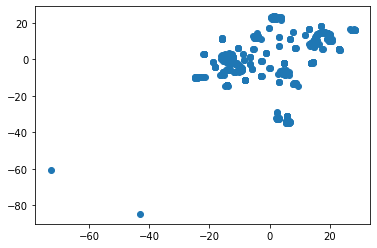

In [15]:
# Create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])

# Cluster Analysis with k-Means

Text(0, 0.5, 'Inertia')

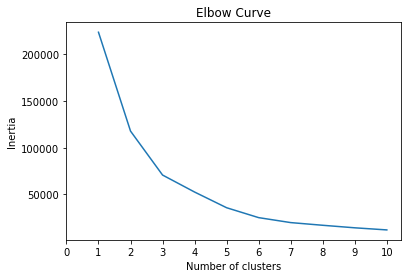

In [16]:
# Use a for-loop to determine the inertia for each k between 1 through 10
inertia = [] 
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create an elbow plot to identify the best number of clusters
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Recommendation

Based on your findings, make a brief (1-2 sentences) recommendation to your clients. Can the cryptocurrencies be clustered together? If so, into how many clusters?

The cryptocurrencies can be clustered together.